# SPAM SMS DETECTION

-----------------

# download data

In [70]:
!pip install --upgrade opendatasets --quiet

In [71]:
import opendatasets as od

In [72]:
source='https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset'

In [73]:
od.download(source)

Skipping, found downloaded files in ".\sms-spam-collection-dataset" (use force=True to force download)


In [74]:
import os

In [75]:
os.listdir()

['.ipynb_checkpoints',
 'bank-customer-churn-prediction',
 'codsoft_bank_churn.ipynb',
 'credit card fraud.ipynb',
 'DATA SCIENCE (3).pdf',
 'fraud-detection',
 'Machine learning.pdf',
 'sms-spam-collection-dataset',
 'spam_sms_detection.ipynb']

In [76]:
os.listdir('sms-spam-collection-dataset')

['.ipynb_checkpoints', 'spam.csv']

# Reading Data

In [77]:
path='sms-spam-collection-dataset/spam.csv'

In [78]:
import pandas as pd
import numpy as np

In [79]:
sms_raw=pd.read_csv(path,encoding_errors='ignore')

In [80]:
sms_raw

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will _ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


# Eda

In [81]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

## spam vs not spam

<Axes: xlabel='v1', ylabel='count'>

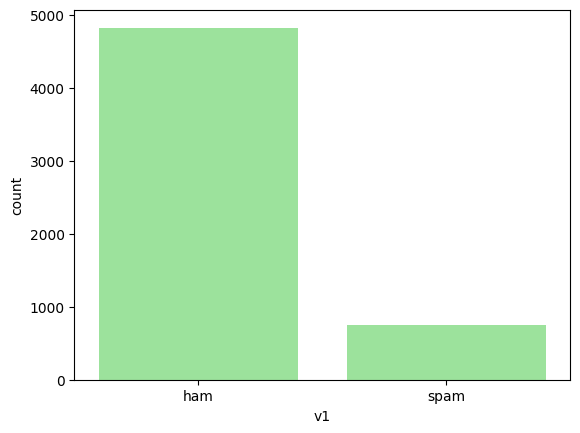

In [82]:
sns.countplot(data=sms_raw,x=sms_raw.v1,color='lightgreen')

#

# Feature engineering

In [83]:
from sklearn import feature_extraction

In [84]:
f = feature_extraction.text.CountVectorizer(stop_words = 'english')
X = f.fit_transform(sms_raw["v2"])
np.shape(X)

(5572, 8368)

**removed the stop words in order to improve the analytics**

# Train, test ,split

In [86]:
sms_raw

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will _ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [87]:
sms_raw['v1'].replace({'spam':1,'ham':0},inplace=True)

In [91]:
from sklearn.model_selection import train_test_split

In [93]:
X_train, X_test, y_train, y_test=train_test_split(X,sms_raw['v1'],test_size=0.3,random_state=42)

In [98]:
X_train.shape,X_test.shape

((3900, 8368), (1672, 8368))

# Multinomial naive bayes classifie

In [101]:
from sklearn.naive_bayes import MultinomialNB

In [125]:
naiv_model=MultinomialNB()

In [126]:
naiv_model.fit(X_train,y_train)

MultinomialNB()

In [127]:
naiv_model.score(X_train,y_train)

0.9953846153846154

In [128]:
naiv_model.score(X_test,y_test)

0.9772727272727273

In [129]:
from sklearn.metrics import confusion_matrix

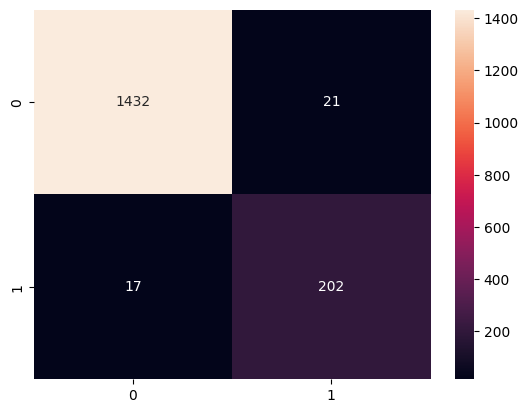

In [141]:
naiv_cfg=confusion_matrix(y_test,naiv_model.predict(X_test))
sns.heatmap(data=naiv_cfg,annot=True,fmt='d');

# Support Vector Machine

In [132]:
from sklearn.svm import SVC

In [133]:
svc_model=SVC()

In [135]:
svc_model.fit(X_train,y_train)

SVC()

In [137]:
svc_model.score(X_train,y_train)

0.9969230769230769

In [138]:
svc_model.score(X_test,y_test)

0.9778708133971292

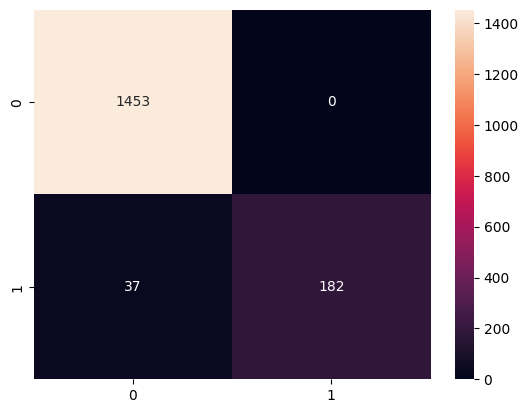

In [143]:
svc_cfg=confusion_matrix(y_test,svc_model.predict(X_test))
sns.heatmap(data=svc_cfg,annot=True,fmt='d');